In [1]:
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from konlpy.corpus import kolaw
from konlpy.tag import Okt

In [2]:
file_names = gutenberg.fileids()
print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [6]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print(len(doc_alice), '\n\n', doc_alice[:300])

144395 

 [Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversatio


In [8]:
tokenizer = RegexpTokenizer(r"[\w']{2,}")
tokens = tokenizer.tokenize(doc_alice)
print(tokens[:20])

["Alice's", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', 'CHAPTER', 'Down', 'the', 'Rabbit', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired']


In [11]:
eng_stopwords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
results = [lemma.lemmatize(token) for token in tokens if token not in eng_stopwords]
print(len(results), '\n\n', results[:20])

13903 

 ["Alice's", 'Adventures', 'Wonderland', 'Lewis', 'Carroll', '1865', 'CHAPTER', 'Down', 'Rabbit', 'Hole', 'Alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped']


In [12]:
alice_word_count = dict()
for word in results:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
print(len(alice_word_count))

2896


In [13]:
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

'said': 456, 'Alice': 385, "'I": 126, 'little': 125, 'The': 93, 'one': 93, 'know': 89, 'like': 85, 'went': 83, 'thing': 80, 'thought': 76, 'time': 74, 'could': 73, 'would': 70, 'Queen': 67, 'see': 66, 'King': 59, 'began': 58, 'head': 58, 'way': 57, 

In [14]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(results) if tag in my_tag_set]
print(my_words[:20])

['get', 'tired', 'sister', 'bank', 'nothing', 'peeped', 'book', 'sister', 'picture', 'conversation', 'use', 'book', 'thought', 'picture', 'conversation', 'mind', 'well', 'hot', 'day', 'feel']


In [17]:
alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')
print('\n\n', len(sorted_word_count))

'said': 456, 'little': 121, 'went': 83, 'thing': 80, 'time': 74, 'thought': 59, 'began': 58, 'way': 57, 'head': 57, 'voice': 50, 'looked': 44, 'got': 44, 'see': 41, 'came': 40, 'tone': 40, 'great': 39, 'round': 38, 'eye': 36, 'get': 35, 'day': 33, 

 1719


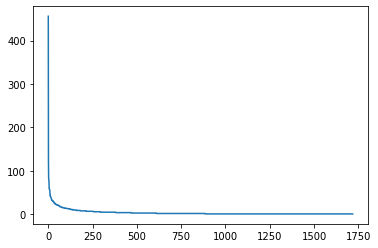

In [19]:
word_freq = [alice_word_count[key] for key in sorted_word_count]
plt.plot(word_freq)
plt.show()

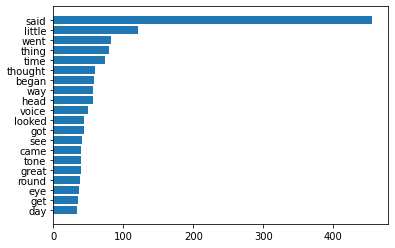

In [20]:
word_top_n = sorted_word_count[:20][::-1]
word_freq = [alice_word_count[key] for key in word_top_n]
plt.barh(range(len(word_top_n)), word_freq, tick_label=word_top_n)
plt.show()

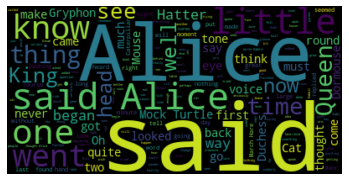

In [24]:
wordcloud = WordCloud().generate(doc_alice)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

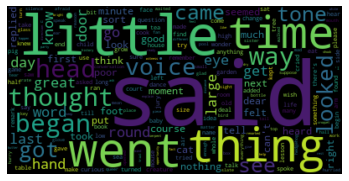

In [25]:
wordcloud = WordCloud().generate_from_frequencies(alice_word_count)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [27]:
const_doc = kolaw.open('constitution.txt').read()
print(const_doc[:100])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [28]:
okt = Okt()
tokens = okt.morphs(const_doc)
print(len(tokens), '\n\n', tokens[:20])

8796 

 ['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로']


In [30]:
tokens_nouns = okt.nouns(const_doc)
tokens_nouns = [token for token in tokens_nouns if len(token) > 1]
print(len(tokens_nouns), '\n\n', tokens_nouns[:20])

3013 

 ['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁']


In [31]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [37]:
const_cnt = dict()
for token in tokens_nouns:
    const_cnt[token] = const_cnt.get(token, 0) + 1

In [39]:
def word_graph(cnt, max_words=10):
    sorted_word_count = sorted(cnt.items(), key=lambda kv: kv[1], reverse=True)
    print(sorted_word_count[:max_words][::-1])
    word, count = zip(*sorted_word_count[:max_words][::-1])

    plt.barh(range(len(word)), count, tick_label=word)
    plt.show()

[('조직', 18), ('의무', 18), ('경제', 18), ('국무총리', 19), ('직무', 19), ('임명', 20), ('선거', 20), ('정부', 20), ('자유', 20), ('의원', 21), ('권리', 21), ('사항', 23), ('기타', 26), ('모든', 37), ('헌법', 53), ('국민', 61), ('국회', 68), ('국가', 73), ('대통령', 83), ('법률', 127)]


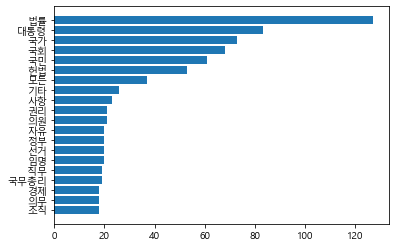

In [40]:
word_graph(const_cnt, 20)

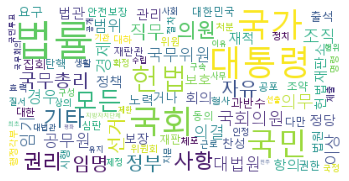

In [42]:
font_path = "c:/Windows/Fonts/malgun.ttf"
wordcloud = WordCloud(font_path=font_path,
                      background_color='white',
                      max_words=100).generate_from_frequencies(const_cnt)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()